<a href="https://colab.research.google.com/github/LeonardoSer/Univ/blob/main/NetOpt/jupyter_notebooks/VertexPacking-gurobi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install -i https://pypi.gurobi.com gurobipy 

import networkx as nx
import gurobipy as gb
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.gurobi.com


In [13]:
G = nx.gnp_random_graph(30,0.2, seed=10)

print(G.number_of_nodes())
print(G.number_of_edges())
print(nx.density(G))

print(G.degree(1))


30
92
0.21149425287356322
8


In [14]:
%matplotlib inline

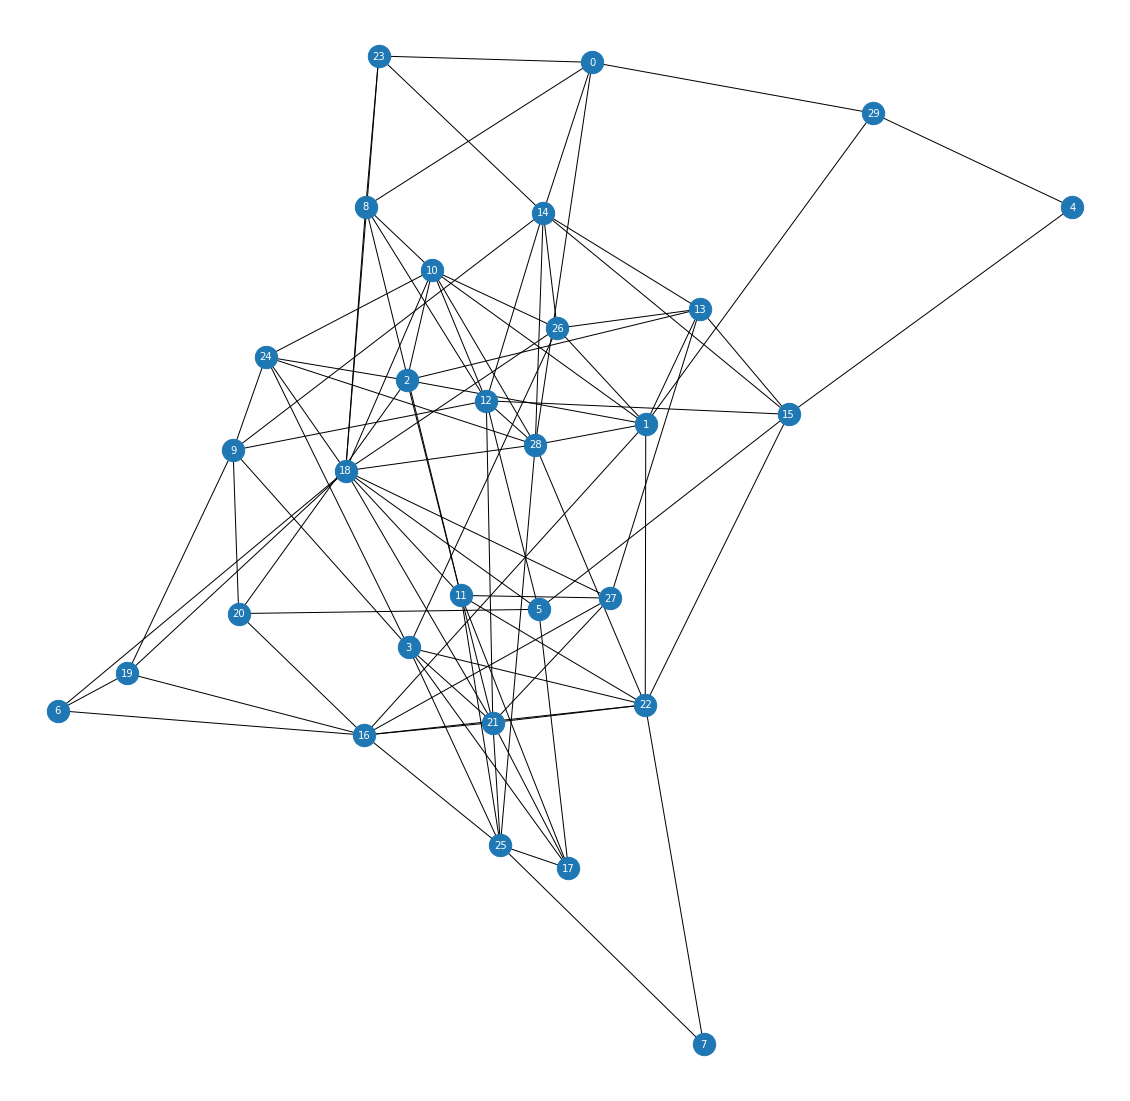

In [15]:

fig, ax = plt.subplots(1, 1, figsize=(20,20))

pos = nx.spring_layout(G, seed=20)

nx.draw(G, pos, ax, with_labels=True, node_size=500, font_size=10, font_color='w')

In [16]:
stableset = gb.Model()
x = stableset.addVars(G.number_of_nodes(), vtype=gb.GRB.BINARY, name='x')
stableset.setObjective(x.sum(),sense=gb.GRB.MAXIMIZE)


Restricted license - for non-production use only - expires 2022-01-13


In [17]:
stableset.addConstrs((x[i] + x[j] <= 1 for i,j in G.edges()), name='edge')
stableset.update()


In [18]:
stableset.optimize()

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 92 rows, 30 columns and 184 nonzeros
Model fingerprint: 0x614d29e0
Variable types: 0 continuous, 30 integer (30 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 8.0000000
Presolve removed 42 rows and 1 columns
Presolve time: 0.00s
Presolved: 50 rows, 29 columns, 134 nonzeros
Variable types: 0 continuous, 29 integer (29 binary)

Root relaxation: objective 1.100000e+01, 18 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      11.0000000   11.00000  0.00%     -    0s

Explored 0 nodes (18 simplex iterations) in 0.04 seconds
Thread

In [19]:
print('Obj: %g' % stableset.objVal)

print ()

stablenodes = list()

for i in G.nodes():
    if (x[i].x > 1e-6):
        stablenodes.append(i)



Obj: 11



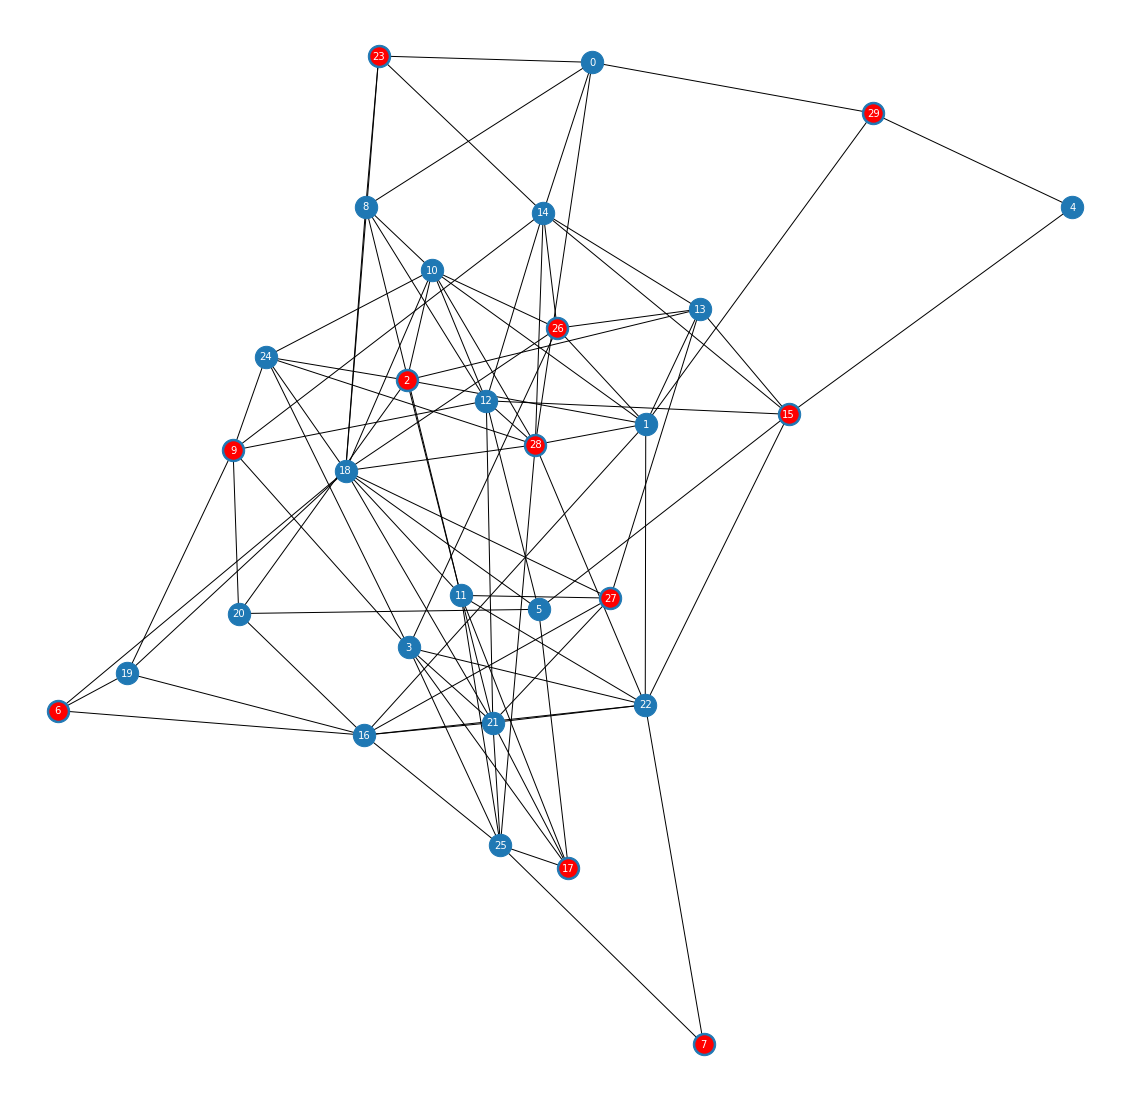

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(20,20))


nx.draw(G, pos, ax, with_labels=True, node_size=500, font_size=10, font_color='w')

nx.draw_networkx_nodes(G, pos, nodelist=stablenodes, node_color ='r')